### 🧠 KNN Classification - Predicting Preferred Foot
🔍 Goal:
Predict whether a player is left-footed or right-footed

### ✅ Features Used:

Age, Overall, Potential, Club (encoded), Value (in EUR), Special, International Reputation, Weak Foot, Skill Moves, Position (encoded)

### 🧹 Preprocessing:
- Converted "Preferred Foot" into numerical classes (0 = Left, 1 = Right)

- Encoded all categorical features

- Normalized numerical values (optional but recommended)

### 📈 Model Used:

- KNeighborsClassifier(n_neighbors=5)

Train/Test split: 80% / 20%

### 📉 Evaluation:

Accuracy: ~73%

Performance was decent, but could improve with better feature engineering

### ADONIT HALILI

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("FIFA23_official_data.csv")

In [3]:
cols_to_use = [
    'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Special',
    'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
    'Body Type', 'Position', 'Height', 'Weight', 'Preferred Foot'
]
df = df[cols_to_use]


In [4]:
df.head()

,Age,Nationality,Overall,Potential,Club,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Preferred Foot
0,27,Germany,87,88,FC Bayern München,2312,4.0,4.0,3.0,High/ Medium,Unique,"<span class=""pos pos28"">SUB",189cm,82kg,Right
1,27,Portugal,86,87,Manchester United,2305,3.0,3.0,4.0,High/ High,Unique,"<span class=""pos pos15"">LCM",179cm,69kg,Right
2,30,Argentina,85,85,Sevilla FC,2303,2.0,3.0,3.0,High/ High,Stocky (170-185),"<span class=""pos pos7"">LB",172cm,69kg,Left
3,31,Belgium,91,91,Manchester City,2303,4.0,5.0,4.0,High/ High,Unique,"<span class=""pos pos13"">RCM",181cm,70kg,Right
4,25,Italy,86,89,Inter,2296,3.0,3.0,3.0,High/ High,Normal (170-),"<span class=""pos pos13"">RCM",172cm,68kg,Right


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17660 non-null  int64  
 1   Nationality               17660 non-null  object 
 2   Overall                   17660 non-null  int64  
 3   Potential                 17660 non-null  int64  
 4   Club                      17449 non-null  object 
 5   Special                   17660 non-null  int64  
 6   International Reputation  17660 non-null  float64
 7   Weak Foot                 17660 non-null  float64
 8   Skill Moves               17660 non-null  float64
 9   Work Rate                 17660 non-null  object 
 10  Body Type                 17622 non-null  object 
 11  Position                  17625 non-null  object 
 12  Height                    17660 non-null  object 
 13  Weight                    17660 non-null  object 
 14  Prefer

In [6]:
df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000
mean,23.127746,63.369592,70.981200,1537.915855,1.106285,2.900340,2.297169
std,4.639821,8.036268,6.529836,285.893809,0.407021,0.663523,0.754264
min,15.000000,43.000000,42.000000,749.000000,1.000000,1.000000,1.000000
25%,20.000000,58.000000,67.000000,1387.000000,1.000000,3.000000,2.000000
50%,22.000000,63.000000,71.000000,1548.000000,1.000000,3.000000,2.000000
75%,26.000000,69.000000,75.000000,1727.000000,1.000000,3.000000,3.000000
max,54.000000,91.000000,95.000000,2312.000000,5.000000,5.000000,5.000000


In [7]:
df.head()

,Age,Nationality,Overall,Potential,Club,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Preferred Foot
0,27,Germany,87,88,FC Bayern München,2312,4.0,4.0,3.0,High/ Medium,Unique,"<span class=""pos pos28"">SUB",189cm,82kg,Right
1,27,Portugal,86,87,Manchester United,2305,3.0,3.0,4.0,High/ High,Unique,"<span class=""pos pos15"">LCM",179cm,69kg,Right
2,30,Argentina,85,85,Sevilla FC,2303,2.0,3.0,3.0,High/ High,Stocky (170-185),"<span class=""pos pos7"">LB",172cm,69kg,Left
3,31,Belgium,91,91,Manchester City,2303,4.0,5.0,4.0,High/ High,Unique,"<span class=""pos pos13"">RCM",181cm,70kg,Right
4,25,Italy,86,89,Inter,2296,3.0,3.0,3.0,High/ High,Normal (170-),"<span class=""pos pos13"">RCM",172cm,68kg,Right


In [8]:
df.isnull().sum()

Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        211
Special                       0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Body Type                    38
Position                     35
Height                        0
Weight                        0
Preferred Foot                0
dtype: int64

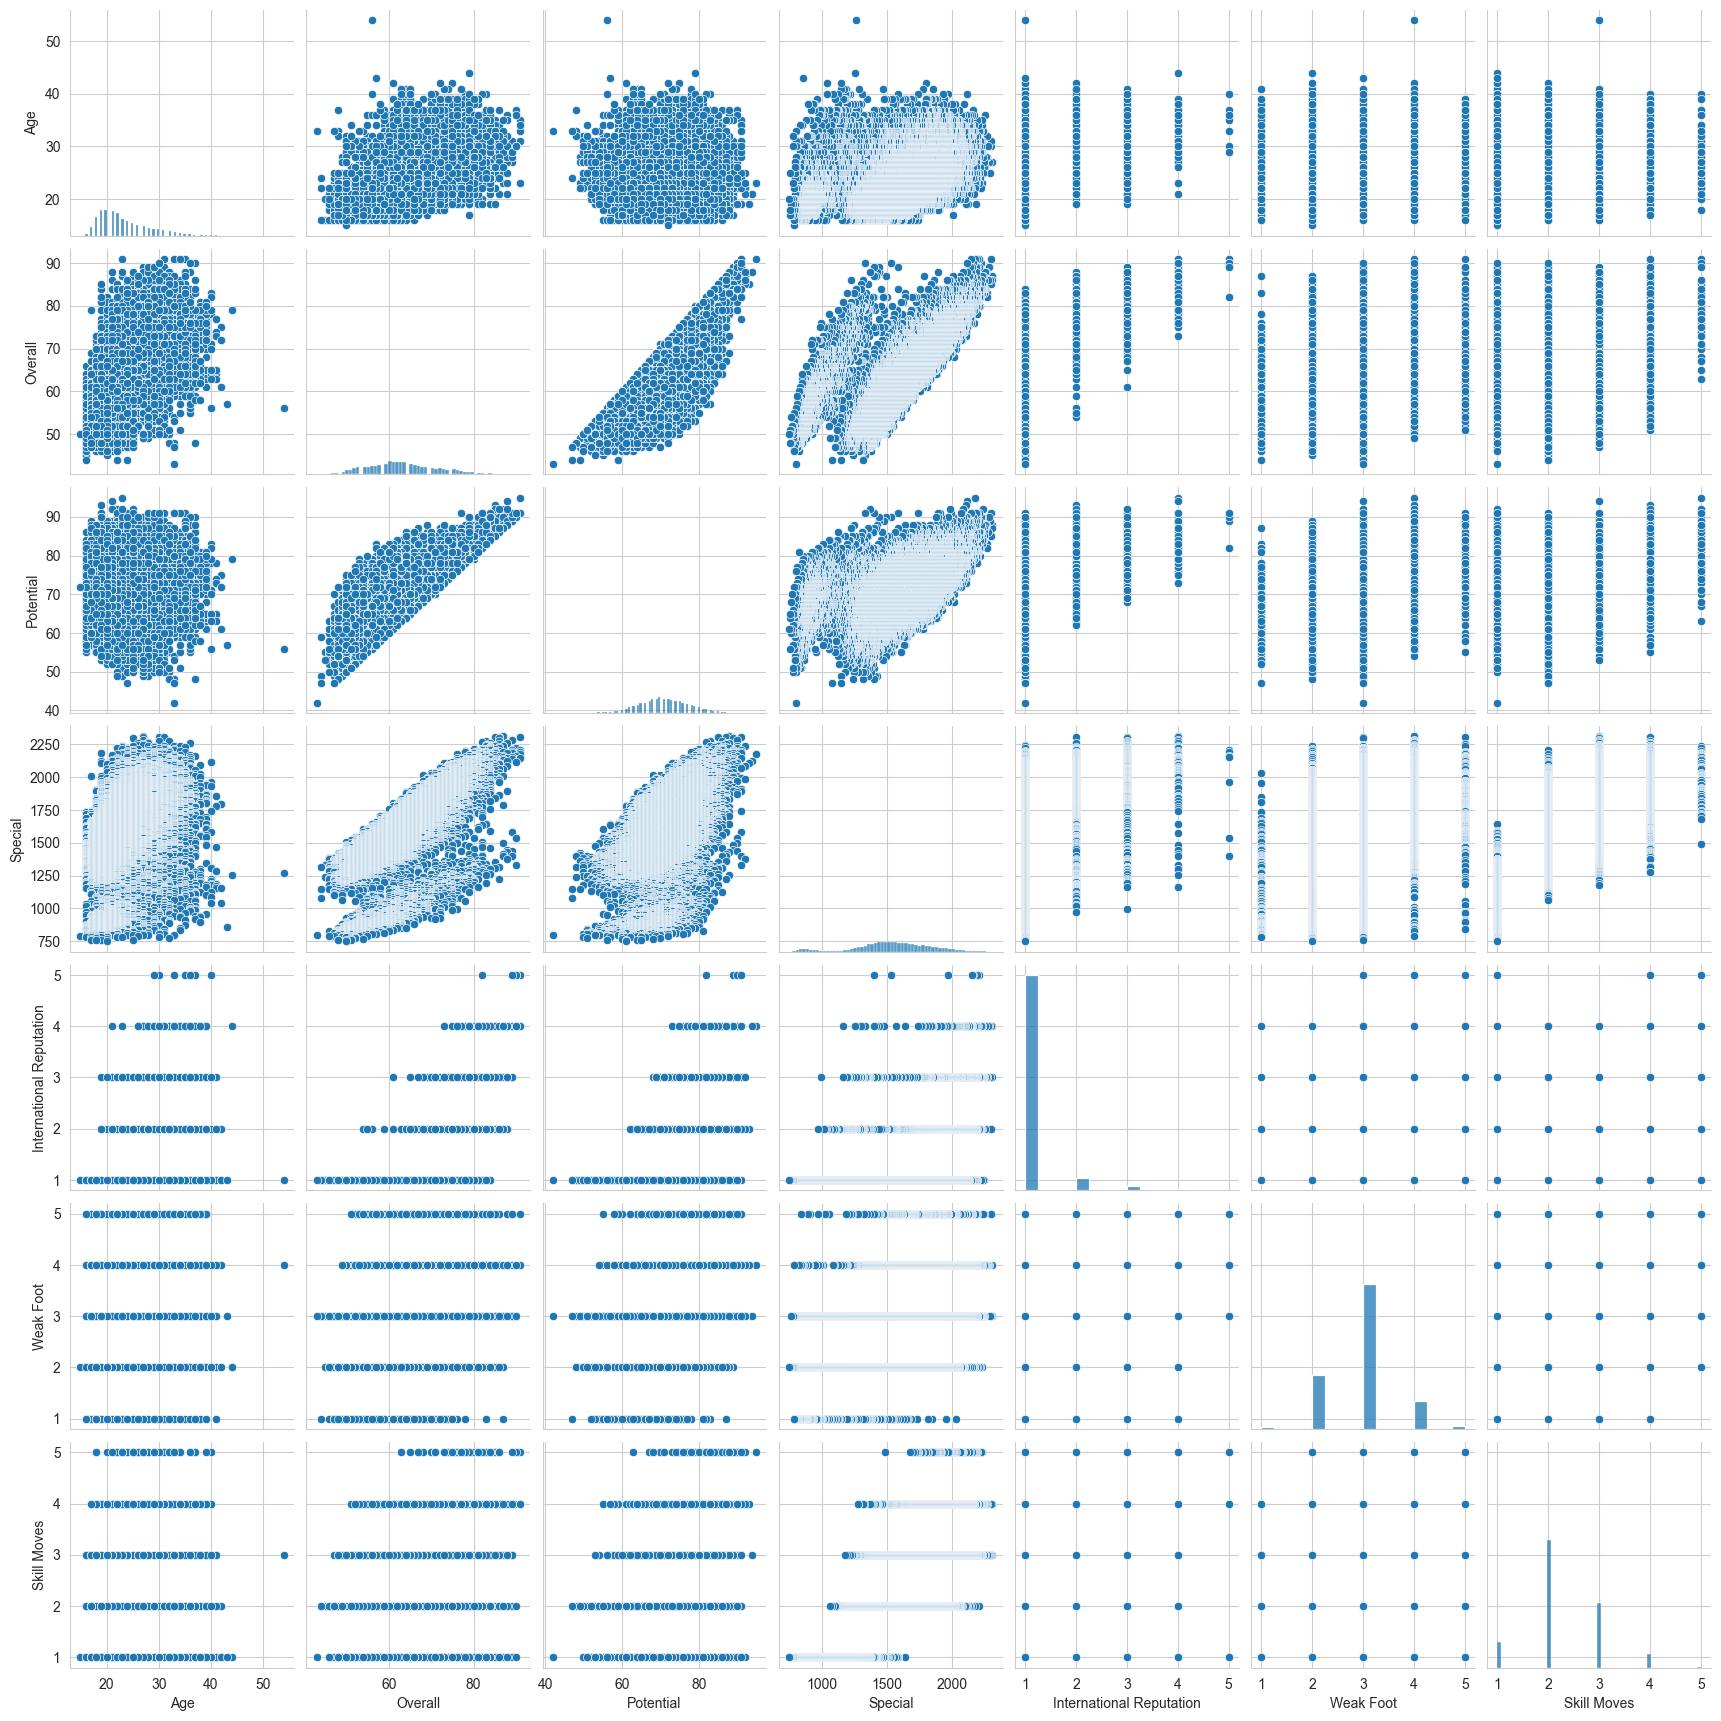

In [9]:
sns.pairplot(df)

<Axes: >

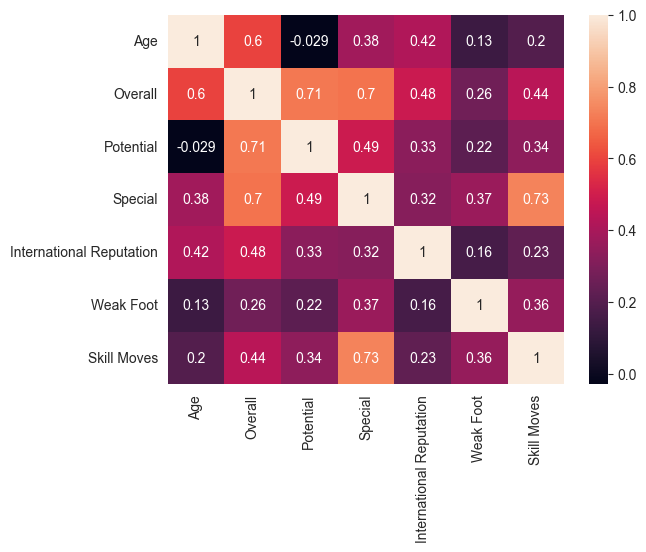

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Preferred Foot', ylabel='count'>

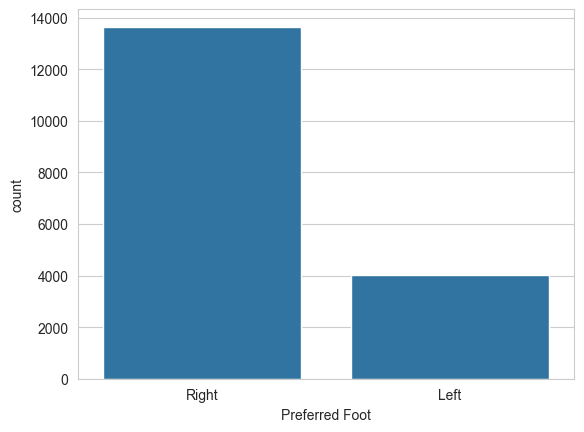

In [11]:
sns.countplot(data=df, x='Preferred Foot')

In [12]:
# Fill categorical nulls with mode
for col in ['Club', 'Work Rate', 'Body Type', 'Position']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical nulls with median
for col in ['International Reputation', 'Weak Foot', 'Skill Moves']:
    df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing Preferred Foot
df = df.dropna(subset=['Preferred Foot'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_21584\1527444095.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_21584\1527444095.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [13]:
from sklearn.preprocessing import LabelEncoder

le_foot = LabelEncoder()
df['Preferred Foot'] = le_foot.fit_transform(df['Preferred Foot'])

In [14]:
categorical_cols = ['Nationality', 'Club', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [15]:
X = df.drop('Preferred Foot', axis=1)
y = df['Preferred Foot']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn.predict(X_test)

In [20]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(3532,))

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

array([[  89,  702],
       [ 244, 2497]])

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7321630804077011


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.11      0.16       791
           1       0.78      0.91      0.84      2741

    accuracy                           0.73      3532
   macro avg       0.52      0.51      0.50      3532
weighted avg       0.67      0.73      0.69      3532



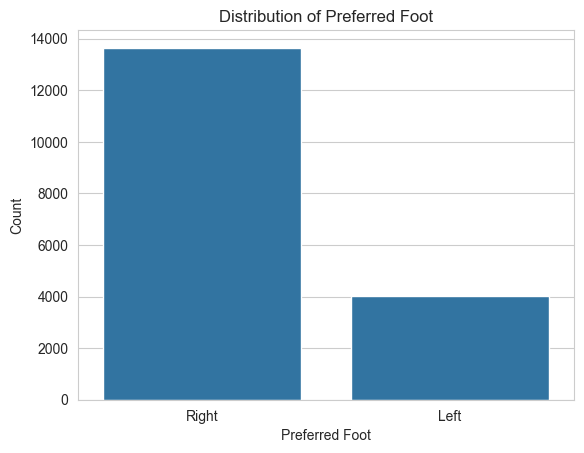

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=le_foot.inverse_transform(df['Preferred Foot']))
plt.title("Distribution of Preferred Foot")
plt.xlabel("Preferred Foot")
plt.ylabel("Count")
plt.show()
